In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%%time 

# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

Reading package lists... Done
Building dependency tree       
Reading state information... Done
gdal-bin is already the newest version (2.2.3+dfsg-2).
python-gdal is already the newest version (2.2.3+dfsg-2).
python3-gdal is already the newest version (2.2.3+dfsg-2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-rtree is already the newest version (0.8.3+ds-1).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-6baeulaf
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-6baeulaf
  Created wheel for geopandas: filename=geopandas-0.8.0+87.gc07ae3c-py2.py3-none-any.whl size=976379 sha256=3feaa2420a61dfe6c8c66c2bf4f29a70d702968cf4b689e668cc1f8a6db62dd3
  Stored in directory: /tmp/pip-ephem-wheel-cache-sdk57j1g/wheels/91/24/71/376c9c67192694168352

In [4]:
#set path to data file
path =  "/content/gdrive/My Drive/filled_CO2.csv"

In [5]:
#import libraries
import pandas as pd
import numpy as np
import geopandas as gpd

In [6]:
# read the datafile
data = pd.read_csv(path, encoding='cp1252')

In [7]:
#set path to shapefiles for data visualisation
shapefile =  "/content/gdrive/My Drive/shape_files/ne_110m_admin_0_countries.shp"

In [8]:
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]

In [9]:
#Read shapefile using Geopandas
gdf = gpd.read_file(shapefile)[['ADMIN', 'ADM0_A3', 'geometry']]
#Rename columns.
gdf.columns = ['country', 'country_code', 'geometry']
gdf.head()

,country,country_code,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Western Sahara,SAH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [10]:
#drop antartica as it will not be needed and takes up space
print(gdf[gdf['country'] == 'Antarctica'])
#Drop row corresponding to 'Antarctica'
gdf = gdf.drop(gdf.index[159])

        country country_code                                           geometry
159  Antarctica          ATA  MULTIPOLYGON (((-48.66062 -78.04702, -48.15140...


In [11]:
#view first five rows of data
data.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.306298,42.786948,43.286613,43.72459,44.130957,44.481908,131.633746,135.055319,358.990001,409.505485,424.783771,519.001013,564.023574,530.385687,571.038292,642.147964,435.85886,616.928696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14306.616300,14391.778200,13040.848000,13535.75410,14945.968200,14574.164000,14746.851000,15247.281000,15112.318000,14923.075000,15691.266000,15810.335000,15615.333000,15322.530000,14278.792100,13545.736900,12269.46240,12400.507300,12959.2948,12348.95700,12528.01650,12307.06380,11370.45310,11390.87480,11290.68820,11635.65940,12505.93080,13343.25000,13793.3670,14812.3660,13530.9530,12585.4020,13842.73810,14709.8840,14654.37400,14770.2643,14849.15940,15272.6330,15288.7756,15554.429500,17791.329900,17981.307290,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60648.601080,39162.171430,42205.650700,44252.66912,40179.233500,44429.300030,38448.024090,43563.412180,46235.114580,56644.651970,48001.866160,41894.794960,45243.802080,44852.060320,35878.300780,36714.190830,35982.41365,46721.257740,35736.7658,39342.98618,50806.54269,43761.08127,64997.83986,39775.10719,44657.24335,48230.29864,47136.21579,33091.22462,35275.1251,36119.4252,34780.6811,34371.8411,34490.36900,35858.0150,36860.23340,35855.7384,36375.82200,36690.5340,37396.2940,38309.465130,40029.392100,40878.651960,41657.164850,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6960.868200,6950.036100,7613.266100,7348.49210,7632.664300,7873.037000,8470.978400,8948.980900,9996.056200,11248.358300,11433.584200,10520.362500,10730.526100,11567.573700,12215.237500,11821.583100,12079.10500,12175.483200,12603.8867,12552.73690,11112.72956,8273.63240,6227.15320,6067.17990,6793.79630,6421.57130,6187.38410,5500.60700,5246.1311,6493.4872,8389.2767,6820.6244,7503.05976,7834.0157,7401.10155,8308.3856,8027.14955,9879.3935,8136.7850,8108.812387,8506.996034,8712.296365,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Last five rows of data
data.tail()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
259,Kosovo,XKX,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4839.5209,5099.1964,5353.7458,5678.1841,5872.2931,5917.5693,6186.5688,6264.1134,6618.7501,6899.5535,7806.9207,7911.1785,8473.5444,9000.1068,9185.6179,9605.3506,10010.3032,10103.0026,11644.3834,12042.575,12850.0134,14536.44773,15337.67187,14603.0136,16621.06553,17884.47327,18386.3043,19676.01703,20869.7911,22895.6985,24225.1802,25210.4164,26580.1033,28983.2226,29514.278,32666.189,34959.446,36225.625,36800.226,37027.20395,38865.29243,39949.08216,40924.62769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253769.7130,250418.7630,250958.9150,269278.4530,275680.1400,294054.8470,308489.5760,309765.4090,286819.5630,298781.0050,307875.5650,311848.0050,309369.2150,299856.8690,NaN,NaN,NaN,NaN,NaN,NaN,349202.0020,343391.11800,353846.54900,347840.7270,355673.58000,371350.20500,383673.2710,403030.55400,457895.8960,430853.8360,420482.7530,416031.2410,434071.0750,456334.1260,472713.791,498312.886,480054.730,502130.255,416382.690,416382.69000,416382.69000,416382.69000,416382.69000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,234168.0700,132574.6880,142670.6350,153119.7910,133429.6510,158349.1940,140274.6140,161327.5230,170040.1250,224649.3700,185987.4950,161735.1910,183354.7570,183318.8410,141719.1910,144149.2600,134957.6390,188042.3310,132223.5680,149004.965,209648.8201,174044.66640,278259.67110,156527.2246,182686.65930,185179.11430,156680.6868,149986.74710,448613.6431,328963.9600,290812.3696,297452.7550,300362.2010,356024.8450,368995.695,396446.481,314793.497,341005.669,321163.519,266118.48360,319784.63040,320024.69700,320254.21830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,Zimbabwe,ZWE,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24033.9270,21404.8690,21231.4000,23156.2520,22589.5250,22661.6320,23324.9560,23276.5890,22595.3620,23746.3610,22756.1390,21833.4510,22737.0210,22613.6900,21986.0670,23895.7750,26007.1410,28160.2670,29369.6430,30264.471,35100.5900,34132.52900,38275.97800,30183.4160,30208.73400,30376.98600,30570.2390,29469.42600,76391.8040,66724.6520,51434.5350,58452.5190,50281.8950,48216.9330,61742.544,59894.603,55535.280,60917.825,68840.706,67914.13101,71019.11673,71561.95225,72057.80332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
data.shape #check number of rows and columns

(264, 65)

In [14]:
data.info() #check data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            240 non-null    float64
 15  1971            239 non-null    float64
 16  1972            239 non-null    float64
 17  1973            238 non-null    flo

In [15]:
data.describe() #statistical summary of data

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.400000e+02,2.390000e+02,2.390000e+02,2.380000e+02,2.370000e+02,2.380000e+02,2.370000e+02,2.380000e+02,2.360000e+02,2.360000e+02,2.400000e+02,2.420000e+02,2.430000e+02,2.430000e+02,2.420000e+02,2.400000e+02,2.400000e+02,2.390000e+02,2.390000e+02,2.380000e+02,2.370000e+02,2.370000e+02,2.330000e+02,2.340000e+02,2.350000e+02,2.350000e+02,2.340000e+02,2.310000e+02,2.330000e+02,2.320000e+02,2.310000e+02,2.310000e+02,2.300000e+02,2.310000e+02,2.310000e+02,2.290000e+02,2.280000e+02,2.300000e+02,2.290000e+02,2.290000e+02,2.290000e+02,2.310000e+02,2.320000e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.060646e+06,9.837851e+05,1.062556e+06,1.102178e+06,1.073280e+06,1.100277e+06,1.155200e+06,1.208104e+06,1.244811e+06,1.310707e+06,1.287483e+06,1.229319e+06,1.329517e+06,1.314179e+06,1.241274e+06,1.255076e+06,1.298344e+06,1.401398e+06,1.350904e+06,1.377472e+06,1.511443e+06,1.520083e+06,1.617188e+06,1.511523e+06,1.530450e+06,1.545770e+06,1.550164e+06,1.752510e+06,1.792898e+06,1.637817e+06,1.624526e+06,1.612054e+06,1.741793e+06,1.802005e+06,1.838048e+06,1.943501e+06,2.010951e+06,2.069871e+06,1.982806e+06,1.958298e+06,2.081614e+06,2.183780e+06,2.198174e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.036003e+06,2.889199e+06,3.106886e+06,3.204695e+06,3.148098e+06,3.205323e+06,3.376149e+06,3.510006e+06,3.591245e+06,3.748806e+06,3.718892e+06,3.594124e+06,3.876906e+06,3.796194e+06,3.641544e+06,3.679407e+06,3.809652e+06,4.059449e+06,3.970787e+06,4.039227e+06,4.354086e+06,4.429297e+06,4.581587e+06,4.366262e+06,4.433745e+06,4.449479e+06,4.484608e+06,5.123722e+06,5.027500e+06,4.596676e+06,4.555728e+06,4.543513e+06,4.918129e+06,5.080530e+06,5.230977e+06,5.493793e+06,5.741698e+06,5.866977e+06,5.674427e+06,5.661435e+06,6.038194e+06,6.350386e+06,6.448962e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.465365e+00,1.472495e+00,1.464315e+00,1.462767e+00,1.433132e+00,1.396194e+00,1.390210e+00,1.397354e+00,1.443546e+00,1.494851e+00,1.554857e+00,1.643482e+00,1.740935e+00,1.849593e+00,1.957326e+00,2.076243e+00,2.151927e+00,2.210366e+00,2.256028e+00,2.316786e+00,2.393595e+00,4.369271e+00,4.488457e+00,4.447011e+00,4.551329e+00,4.630908e+00,4.677679e+00,4.775132e+00,4.800986e+00,4.882099e+00,4.896875e+00,4.907344e+00,5.034354e+00,5.041195e+00,5.039763e+00,5.042693e+00,5.045092e+00,5.052994e+00,5.062560e+00,5.068208e+00,5.109678e+00,5.175981e+00,5.239917e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.245536e+03,6.251476e+03,6.875302e+03,7.086147e+03,7.575346e+03,7.406776e+03,7.832739e+03,8.124376e+03,8.526768e+03,8.910901e+03,8.478887e+03,7.953875e+03,7.964778e+03,8.325552e+03,7.959216e+03,8.783115e+03,8.545695e+03,9.245244e+03,8.924944e+03,9.404326e+03,1.049790e+04,9.718725e+03,1.055774e+04,1.089544e+04,1.048952e+04,1.060879e+04,1.064193e+04,1.143790e+04,1.187458e+04,1.172720e+04,1.153106e+04,1.216976e+04,1.292910e+04,1.287115e+04,1.326770e+04,1.344582e+04,1.446144e+04,1.444506e+04,1.508259e+04,1.555443e+04,1.542876e+04,1.485965e+04,1.445679e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.519353e+04,4.137785e+04,4.490546e+04,4.747921e+04,4.410892e+04,4.689000e+04,4.608272e+04,4.808717e+04,5.154129e+04,5.433027e+04,5.226628e+04,4.783453e+04,4.933093e+04,4.905256e+04,4.660412e+04,4.792281e+04,4.987791e+04,5.141915e+04,5.437485e+04,5.656610e+04,5.804268e+04,5.622215e+04,5.750593e+04,5.578939e+04,5.577752e+04,5.795763e+04,5.880052e+04,6.219079e+04,7.624500e+04,6.969292e+04,6.855355e+04,6.873368e+04,7.272774e+04,7.500253e+04,7.108231e+04,7.554376e+04,7.46

In [16]:
#Drop empty columns
data1 = data.drop(['1960',	'1961',	'1962',	'1963',	'1964', '1965',	'1966',	'1967',	'1968',	'1969', '2013',	'2014',	'2015',	'2016',	'2017',	'2018',	'2019',	'2020'], axis = 1)


In [17]:
#Filter data for year 1990.
df_1990 = data1[['Country Code','1990']]
#Merge dataframes gdf and df_1990.
merged = gdf.merge(df_1990, left_on = 'country_code', right_on = 'Country Code',)

In [18]:
merged.head(3) #show first 3 rows

,country,country_code,geometry,Country Code,1990
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,2328.8648
1,United Republic of Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,94958.0460
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,608685.0000


In [19]:
import matplotlib.pyplot as plt

In [20]:
!pip install mapclassify

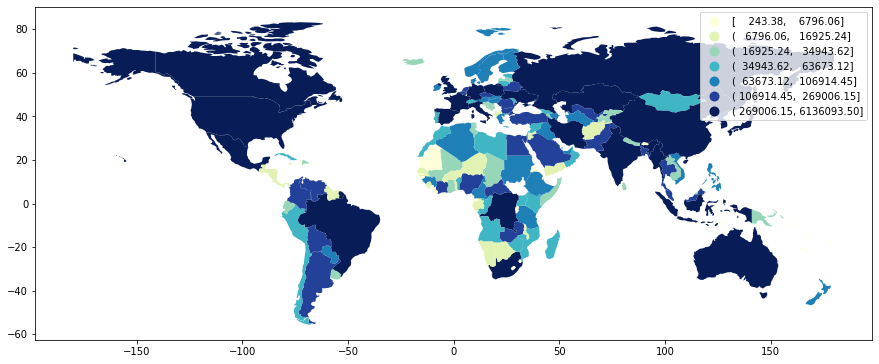

In [21]:
#Plot 1990 Co2 data
ax = merged.plot(column='1990', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=7, legend =  
                                  True);

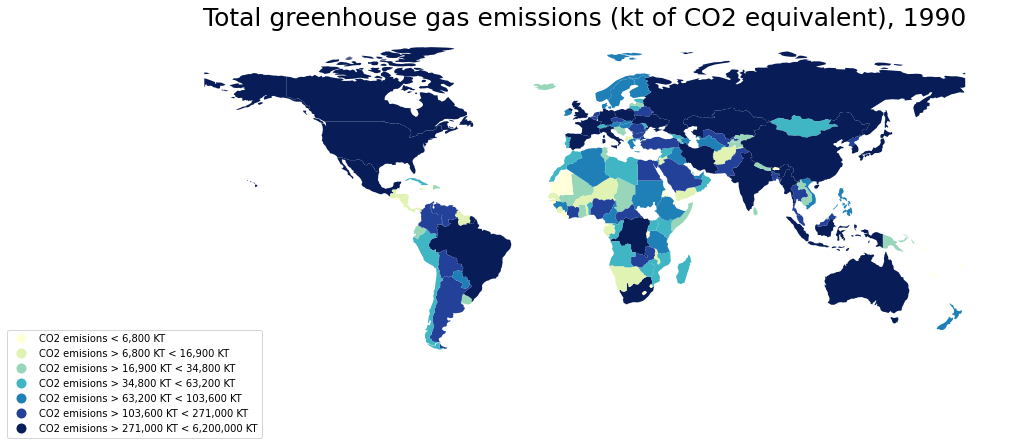

In [24]:
#add title to the map
ax.set_title('Total greenhouse gas emissions (kt of CO2 equivalent), 1990', fontdict= 
            {'fontsize':25})
#remove axes
ax.set_axis_off()
#move legend to an empty space
ax.get_legend().set_bbox_to_anchor((.12,.12))
ax.get_figure()




In [23]:
#change legend
leg = ax.get_legend()
leg.get_texts()[0].set_text('CO2 emisions < 6,800 KT')
leg.get_texts()[1].set_text('CO2 emisions > 6,800 KT < 16,900 KT')
leg.get_texts()[2].set_text('CO2 emisions > 16,900 KT < 34,800 KT')
leg.get_texts()[3].set_text('CO2 emisions > 34,800 KT < 63,200 KT')
leg.get_texts()[4].set_text('CO2 emisions > 63,200 KT < 103,600 KT')
leg.get_texts()[5].set_text('CO2 emisions > 103,600 KT < 271,000 KT')
leg.get_texts()[6].set_text('CO2 emisions > 271,000 KT < 6,200,000 KT')

In [25]:
#Filter data for year 2012.
df_2012 = data1[['Country Code','2012']]
#Merge dataframes gdf and df_2012.
merged1 = gdf.merge(df_2012, left_on = 'country_code', right_on = 'Country Code')

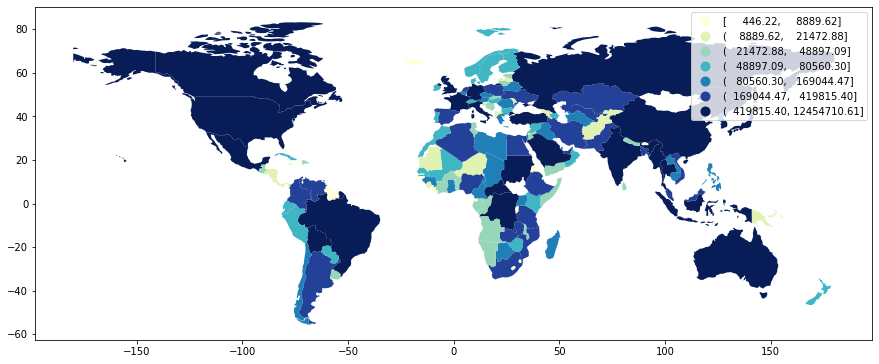

In [26]:
ax1 = merged1.plot(column='2012', cmap =    
                                'YlGnBu', figsize=(15,9),   
                                 scheme='quantiles', k=7, legend =  
                                  True);

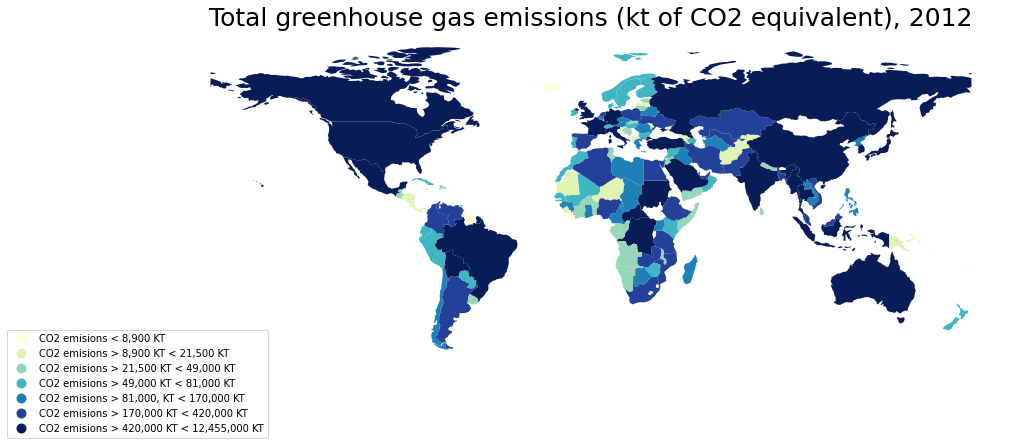

In [29]:
#add title to the map
ax1.set_title('Total greenhouse gas emissions (kt of CO2 equivalent), 2012', fontdict= 
            {'fontsize':25})
#remove axes
ax1.set_axis_off()
#move legend to an empty space
ax1.get_legend().set_bbox_to_anchor((.12,.12))
ax1.get_figure()

In [28]:
leg = ax1.get_legend()
leg.get_texts()[0].set_text('CO2 emisions < 8,900 KT')
leg.get_texts()[1].set_text('CO2 emisions > 8,900 KT < 21,500 KT')
leg.get_texts()[2].set_text('CO2 emisions > 21,500 KT < 49,000 KT')
leg.get_texts()[3].set_text('CO2 emisions > 49,000 KT < 81,000 KT')
leg.get_texts()[4].set_text('CO2 emisions > 81,000, KT < 170,000 KT')
leg.get_texts()[5].set_text('CO2 emisions > 170,000 KT < 420,000 KT')
leg.get_texts()[6].set_text('CO2 emisions > 420,000 KT < 12,455,000 KT')

In [30]:
#filter data to find total Co2 contributions by each continent
compare = data1.loc[data1['Country Name'].isin(['East Asia & Pacific','Europe & Central Asia', 'Latin America & Caribbean', 'Middle East & North Africa', 'Sub-Saharan Africa'])]

In [31]:
compare.head() #check first five rows
compare1 = compare.drop(['Country Code',	'Indicator Name', 'Indicator Code'], axis = 1) #drop these columns
compare2 = compare1.T #transpose data
compare2.head(4) #check to see if data is in the right form

,61,63,132,151,215
Country Name,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,Sub-Saharan Africa
1970,4.87856e+06,9.05046e+06,2.45461e+06,634579,3.14518e+06
1971,4.60455e+06,9.10133e+06,2.05878e+06,669141,2.26405e+06
1972,5.38045e+06,9.49781e+06,2.31863e+06,733877,2.35921e+06


In [32]:
compare2.to_csv('gdrive/My Drive/comparison.csv') #write to csv and save file as comparison

In [33]:
test = "/content/gdrive/My Drive/comparison.csv" #set path to comparison csv
data_comparison = pd.read_csv(test,skiprows=1, encoding='cp1252') #read data
data_comparison.rename(columns={'Country Name':'Date'}, inplace=True) #rename columns
data_comparison.set_index('Date') #set date as index
#convert Date to datetime
data_comparison['Date'] = pd.to_datetime(data_comparison['Date'], format='%Y') #covert format to year
data_comparison.head(5) #check first 5 rows

,Date,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,Sub-Saharan Africa
0,1970-01-01,4878563.391,9050460.734,2454614.933,634578.7486,3145184.861
1,1971-01-01,4604553.968,9101331.929,2058777.363,669140.8086,2264050.094
2,1972-01-01,5380452.089,9497811.588,2318632.528,733877.1722,2359208.442
3,1973-01-01,5538386.312,9876616.108,2185736.061,830530.0606,2529215.820
4,1974-01-01,5081045.492,9936637.465,2316630.088,831556.8276,2264326.434


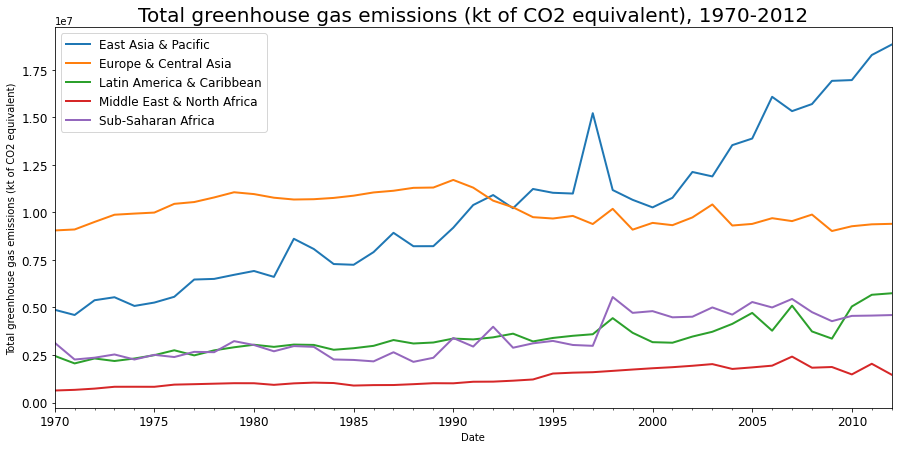

In [34]:
ax_1 = data_comparison.plot(x = 'Date', linewidth=2, fontsize=12, figsize = (15,7));

# Additional customizations
ax_1.set_xlabel('Date');
ax_1.set_ylabel('Total greenhouse gas emissions (kt of CO2 equivalent)');
ax_1.set_title('Total greenhouse gas emissions (kt of CO2 equivalent), 1970-2012', fontdict= 
            {'fontsize':20})
ax_1.legend(fontsize=12);

In [35]:
p = data1.set_index('Country Code') #set index to country code to remove rows not needed

In [36]:
#drop rows not needed 
a = p.drop(index = ["MIC", 'IBT', 'LMY', 'WLD', 'IBD', 'UMC', 'LTE', 'EAS', 'OED', 'HIC', 'EAP', 'TEA', 'PST', 'ECS', 'EAR', 'LMC', 'NAC', 'LCN', 'IDA', 'TLA', 'LAC', 'TEC', 'IDX', 'LDC', 'HPC', 'SSF', 'ECA', 'TSS', 'SSA', 'FCS', 'PRE', 'EUU', 'SAS', 'TSA', 'LIC', 'EMU', 'ARB', 'MEA', 'IDB', 'MNA', 'TMN', 'CEB'])
                                     

In [37]:
# 5 countries with largest Co2 emissions in 2012 
top_5 = a.nlargest(5, ['2012']) 
top_5.head()

,Country Name,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
Country Code,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CHN,China,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1873971.675,1914331.770,1999689.065,2057487.380,2073854.510,2264422.920,2327790.400,2516150.877,2726399.89,2773803.817,2757430.090,2724309.237,2815057.937,2950585.591,3135783.747,3142896.374,3282780.787,3349248.613,3680670.847,3800686.210,3892675.160,4035212.607,4172493.295,4398290.82,4613489.247,5042349.120,5181880.514,5113706.854,5141402.70,5079293.70,5082325.60,5145521.55,5474914.90,6226962.50,7116642.40,7803535.60,8573395.40,9124046.50,10022024.80,1.061726e+07,1.118381e+07,1.206426e+07,1.245471e+07
USA,United States,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,5400503.500,5440420.620,5704297.250,5912971.380,5756864.100,5539255.420,5868459.650,6048233.100,6054464.70,6135462.900,5896082.800,5830249.400,5534118.000,5524777.800,5761217.300,5776897.600,5731026.300,5743632.700,6185748.000,6221391.600,6136093.500,6073643.800,6137498.400,6282704.30,6374979.200,6365296.600,6577713.100,6724414.400,6749016.10,6808137.80,6969123.80,6821235.60,6981786.80,6991255.20,7244271.50,7182808.40,6994086.90,7128951.70,6648991.20,6.604069e+06,6.713349e+06,6.571654e+06,6.343841e+06
IND,India,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,746498.110,754018.475,767242.360,773571.615,796885.360,827298.045,852598.240,871680.045,875174.32,905452.595,929414.770,979738.350,1011305.490,1059291.570,1117754.100,1140356.790,1199500.610,1202058.620,1305250.630,1365390.780,1387371.820,1443266.280,1486420.600,1521727.90,1581028.220,1651503.010,1708836.970,1761537.390,1768965.00,1956039.00,1885189.00,1875600.85,1917294.66,1976449.15,2090334.85,2117460.59,2232760.11,2382011.76,2438714.28,2.594640e+06,2.771457e+06,2.828846e+06,3.002895e+06
BRA,Brazil,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,1260982.146,968552.518,1138194.337,1022867.644,1098489.802,1214606.743,1384864.346,1173040.901,1343364.23,1415028.578,1499555.516,1392080.679,1445809.236,1458951.572,1260054.274,1322535.347,1405162.361,1612857.168,1454114.831,1476408.951,1606209.334,1569962.220,1649183.804,1772640.53,1455453.224,1574445.629,1613760.437,1647413.793,2263725.63,1595863.26,1222630.43,1277451.88,1591827.05,1624554.70,1967427.39,2386439.68,1621079.23,2703498.56,1532859.83,1.211969e+06,2.902243e+06,2.953041e+06,2.989418e+06
RUS,Russian Federation,Total greenhouse gas emissions (kt of CO2 equi...,EN.ATM.GHGT.KT.CE,2240872.970,2244826.890,2405407.750,2450946.310,2531226.890,2692997.650,2800716.030,2847656.500,2914879.88,2964555.530,3028837.500,3032439.530,3060875.900,3076796.390,3113508.600,3147716.560,3237017.690,3294290.420,3376294.370,3390140.820,3593581.920,3391970.110,3128013.230,3013967.26,2707580.730,2645144.690,2718564.860,2457479.790,3459685.66,2512656.97,2771222.00,2649244.38,2984844.66,3542027.45,2413520.92,2527172.17,2748951.04,2604102.33,2995286.60,2.562921e+06,2.603290e+06,2.777724e+06,2.803398e+06


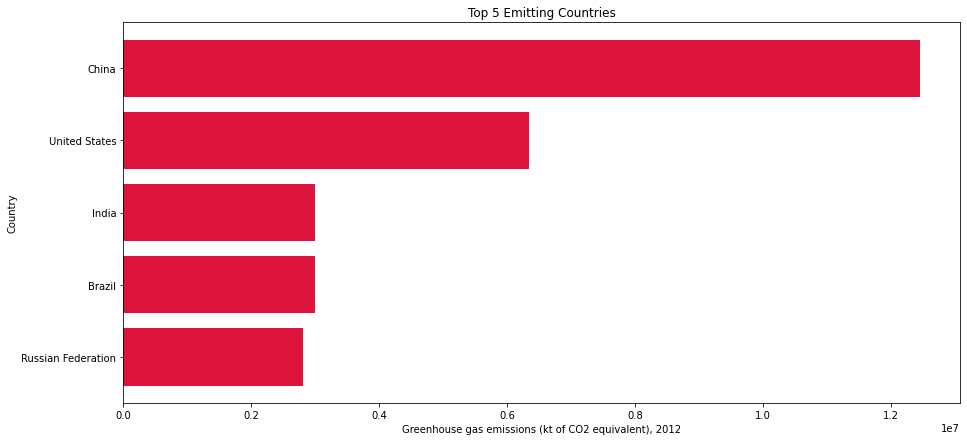

In [39]:
#plot top five countries
# Figure Size
fig, ax3 = plt.subplots(figsize=(15,7))

# Horizontal Bar Plot
ax3.barh(top_5['Country Name'], top_5['2012'], color='crimson')  
plt.title('Top 5 Emitting Countries')
plt.xlabel('Greenhouse gas emissions (kt of CO2 equivalent), 2012')
plt.ylabel('Country')   
ax3.invert_yaxis() 